In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [275]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils
from keras.utils.np_utils import to_categorical

In [4]:
!unzip /content/drive/MyDrive/KAN_CROP.zip

Streaming output truncated to the last 5000 lines.
 extracting: KAN_CROP/F09/words/02/04/frames0.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames1.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames10.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames11.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames12.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames13.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames14.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames15.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames16.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames17.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames18.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames19.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames2.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames3.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames4.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames5.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames6.jpg  
 extracting: KAN_CROP/F09/words/02/04/frames7.jpg  
 ex

In [5]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
    	coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [6]:
def crop_and_save_image(img, img_path, write_img_path, img_name):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('/content/drive/MyDrive/data/shape_predictor_68_face_landmarks.dat')
    # load the input image, resize it, and convert it to grayscale

    image = cv2.imread(img_path)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) > 1:
    	print( "ERROR: more than one face detected")
    	return
    if len(rects) < 1:
    	print( "ERROR: no faces detected")
    	return

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        name, i, j = 'mouth', 48, 68
        # clone = gray.copy()

        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))        
        roi = gray[y:y+h, x:x+w]
        roi = imutils.resize(roi, width = 250, inter=cv2.INTER_CUBIC)        
        print('/content/cropped' + write_img_path)
        cv2.imwrite('/content/cropped' + write_img_path, roi)

In [7]:
os.listdir('/content/drive/MyDrive/data/dataset/dataset')
predictor = dlib.shape_predictor('/content/drive/MyDrive/data/shape_predictor_68_face_landmarks.dat')

In [276]:
people = ['F01','F02','F03','F04','F05','F06','F07','F08', 'F09','F10','M01','M02','M03','M04','M05']
data_types = ['words']
folder_enum = ['01','02','03','04','05']
instances = ['01','02','03','04','05']

words = ['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu']          
words_di = {i:words[i] for i in range(len(words))}

In [277]:
if not os.path.exists('/content/cropped'):
    os.mkdir('/content/cropped')

In [278]:
import shutil

def crop_one_person():      
    os.mkdir('cropped')
    people = ['F01']
    data_types = ['words']
    folder_enum = ['01']
    instances = ['01']

    i = 1
    for person_ID in people:
        if not os.path.exists('/content/cropped' + person_ID ):
            os.mkdir('/content/cropped' + person_ID + '/')

        for data_type in data_types:
            if not os.path.exists('/content/cropped' + person_ID + '/' + data_type):
                os.mkdir('/content/cropped' + person_ID + '/' + data_type)

            for phrase_ID in folder_enum:
                if not os.path.exists('/content/cropped' + person_ID + '/' + data_type + '/' + phrase_ID):
                    # F01/phrases/01
                    os.mkdir('/content/cropped' + person_ID + '/' + data_type + '/' + phrase_ID)

                for instance_ID in instances:
                    # F01/phrases/01/01
                    directory = '/content/drive/MyDrive/data/dataset/dataset' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                    dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
    #                 print(directory)
                    filelist = os.listdir(directory)
                    if not os.path.exists('/content/cropped' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
                        os.mkdir('/content/cropped' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)

                        for img_name in filelist:
                            if img_name.startswith('color'):
                                image = imageio.imread(directory + '' + img_name)
                                crop_and_save_image(image, directory + '' + img_name,
                                                    dir_temp + '' + img_name, img_name)

    print(f'Iteration : {i}')
    i += 1
    shutil.rmtree('/content/cropped')

In [279]:
os.listdir('/content/KAN_CROP')

['F06',
 'M03',
 'F07',
 'M05',
 'F04',
 'M04',
 'M01',
 'M02',
 'F02',
 'F10',
 'F01',
 'F09',
 'F05',
 'F08',
 'F03']

In [317]:
max_seq_length = 42

X_train = []
y_train = []
# X_val = []
# y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [318]:
from skimage.transform import resize
import time

In [319]:
t1 = time.time()
# UNSEEN_VALIDATION_SPLIT = ['04']
UNSEEN_TEST_SPLIT = ['05']

directory = "/content/KAN_CROP"


for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                filelist = sorted(os.listdir(path + '/'))
                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('frames'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)                        
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)
                                
                if iteration in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                # elif iteration in UNSEEN_VALIDATION_SPLIT:
                #     X_val.append(sequence)
                #     y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)     
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

Finished reading images for person F01. Time taken : 2.361699104309082 secs.
Finished reading images for person F02. Time taken : 2.125086784362793 secs.
Finished reading images for person F03. Time taken : 2.1245367527008057 secs.
Finished reading images for person F04. Time taken : 2.1609795093536377 secs.
Finished reading images for person F05. Time taken : 1.6946485042572021 secs.
Finished reading images for person F06. Time taken : 1.4059584140777588 secs.
Finished reading images for person F07. Time taken : 2.2292685508728027 secs.
Finished reading images for person F08. Time taken : 1.2649435997009277 secs.
Finished reading images for person F09. Time taken : 1.572608470916748 secs.
Finished reading images for person F10. Time taken : 1.2355902194976807 secs.
Finished reading images for person M01. Time taken : 2.189305543899536 secs.
Finished reading images for person M02. Time taken : 2.9035496711730957 secs.
Finished reading images for person M03. Time taken : 2.1581773757934

In [320]:
X_train = np.array(X_train)
# X_val = np.array(X_val)
X_test = np.array(X_test)
# print(X_train)
# print(X_val)
# print(X_test)

In [321]:
print(X_train.shape)
# print(X_val.shape)
print(X_test.shape)

(300, 42, 100, 100)
(75, 42, 100, 100)


In [322]:
y_train = np.array(y_train)
# y_val = np.array(y_val)
y_test = np.array(y_test)
print(y_train.shape)

(300,)


In [323]:
print(y_train.shape)
# print(y_val.shape)
print(y_test.shape)
# print(y_test)

(300,)
(75,)


In [324]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [325]:

from keras.utils import np_utils, generic_utils

In [326]:
np.seterr(divide='ignore', invalid='ignore')
X_train = normalize_it(X_train)
# print(X_train)
# X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train,5)
y_test = np_utils.to_categorical(y_test,5)
# y_val = np_utils.to_categorical(y_val,5)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
# X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [327]:
X_train = np.expand_dims(X_train, axis=4)
# X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [328]:
print(X_train.shape)
# print(X_val.shape)
print(X_test.shape)

(300, 42, 100, 100, 1)
(75, 42, 100, 100, 1)


In [329]:
X_train=X_train.reshape(300,42,-1)
print(X_train.shape)
# X_val=X_val.reshape(75,42,-1)
X_test=X_test.reshape(75,42,-1)

(300, 42, 10000)


In [330]:
# y_train=y_train.reshape(-1,1)
# y_test=y_test.reshape(-1,1)
# print(y_train.shape)
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder()
# y_train = lb_make.fit_transform(y_train)
# y_test = lb_make.fit_transform(y_test)


In [331]:
# X_train = np.zeros((1050, 22, 100, 100), dtype=np.uint8)
# X_train = np.reshape(X_train, (1050, 22, 100*100))
# print(X_train.shape)

# X_val=np.zeros((150, 22, 100, 100), dtype=np.uint8)
# X_val= np.reshape(X_val, (150, 22, 100*100))
# print(X_val.shape)

In [332]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop 

In [333]:
# # from keras.layers.normalization import BatchNormalization
# #callbacks1 = [callbacks11,callbacks21]
# model = Sequential()

# model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
# # model.add(LSTM(128,return_sequences=True,activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# model.add(LSTM(256,activation='relu'))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dropout(0.275))
# model.add(Dense(512))
# #model1.add(Dropout(0.4))
# model.add(Dense(1024))
# model.add(Dense(9,activation='softmax'))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# print(model.summary())

In [334]:
# model = Sequential()

# # 1st layer group
# model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(256, (2, 2, 2), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
# # model.add(BatchNormalisation)
# model.add((Flatten()))
# # model.add(BatchNormalization())

# # # FC layers group
# model.add(Dense(4096, activation='relu'))
# # model.add(BatchNormalization())
# model.add(Dropout(.4))
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(.4))

# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
# model.summary()

In [335]:
# model = Sequential()

# # 1st layer group
# model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model(tf.keras.Input((22, 100, 100, 1)))
# shape = model.get_output_shape_at(0)
# model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))

# # LSTMS - Recurrent Network Layer
# model.add(LSTM(32, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
# # model.add(LSTM(64, return_sequences=True))
# # model.add(LSTM(64, return_sequences=True))
# # model.add(LSTM(128, return_sequences=True))
# # model.add(LSTM(128, return_sequences=True))

# model.add(Dropout(.5))

# model.add((Flatten()))

# # # FC layers group
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
# model.summary()

In [382]:
model= Sequential()
model.add(LSTM(32,input_shape=(42,100*100),return_sequences=True))
# model.add(Dropout(.4))
# model.add(LSTM(128, return_sequences=True))

model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_119 (LSTM)             (None, 42, 32)            1284224   
                                                                 
 flatten_22 (Flatten)        (None, 1344)              0         
                                                                 
 dense_151 (Dense)           (None, 2048)              2754560   
                                                                 
 dropout_107 (Dropout)       (None, 2048)              0         
                                                                 
 dense_152 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_108 (Dropout)       (None, 1024)              0         
                                                                 
 dense_153 (Dense)           (None, 5)               

In [100]:
# model = Sequential()
# model.add(LSTM(64,return_sequences=True, input_shape=(42, 75*75),activation='relu'))
# model.add(Dropout(0.5))
# model.add(LSTM(20,return_sequences=True))
# model.add(Dropout(0.5))
# model.add(Dense(5))
# model.compile(loss='mse', optimizer='adam')

In [ ]:
# inp=X_train.shape
# x = TimeDistributed(LSTM(256, return_sequences=True))(inp)

# model = Model(inp, x)
# model.compile('adam', 'mse')
# model.summary()
# model = Sequential()
# model.add(LSTM(24 , return_sequences = True))
# model.add(Dropout(dp))

In [306]:
# model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [269]:
# from keras.callbacks import TensorBoard

In [383]:
# print(y_val.shape)
# print(y_train.shape)
# print(X_val.shape)

t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
t2 = time.time()
print(f"Training time : {t2 - t1} secs.")
print(y_val.shape)

Epoch 1/50
10/10 [==============================] - 2s 102ms/step - loss: 1.7065 - accuracy: 0.2067 - val_loss: 1.6095 - val_accuracy: 0.1867
Epoch 2/50
10/10 [==============================] - 0s 42ms/step - loss: 1.6181 - accuracy: 0.2333 - val_loss: 1.6083 - val_accuracy: 0.2000
Epoch 3/50
10/10 [==============================] - 0s 42ms/step - loss: 1.6263 - accuracy: 0.1833 - val_loss: 1.6106 - val_accuracy: 0.2000
Epoch 4/50
10/10 [==============================] - 0s 43ms/step - loss: 1.6208 - accuracy: 0.1800 - val_loss: 1.6099 - val_accuracy: 0.2133
Epoch 5/50
10/10 [==============================] - 0s 42ms/step - loss: 1.6144 - accuracy: 0.1867 - val_loss: 1.6085 - val_accuracy: 0.2133
Epoch 6/50
10/10 [==============================] - 0s 43ms/step - loss: 1.6118 - accuracy: 0.2233 - val_loss: 1.6068 - val_accuracy: 0.2000
Epoch 7/50
10/10 [==============================] - 0s 43ms/step - loss: 1.6097 - accuracy: 0.1933 - val_loss: 1.6079 - val_accuracy: 0.2400
Epoch 8/50
1

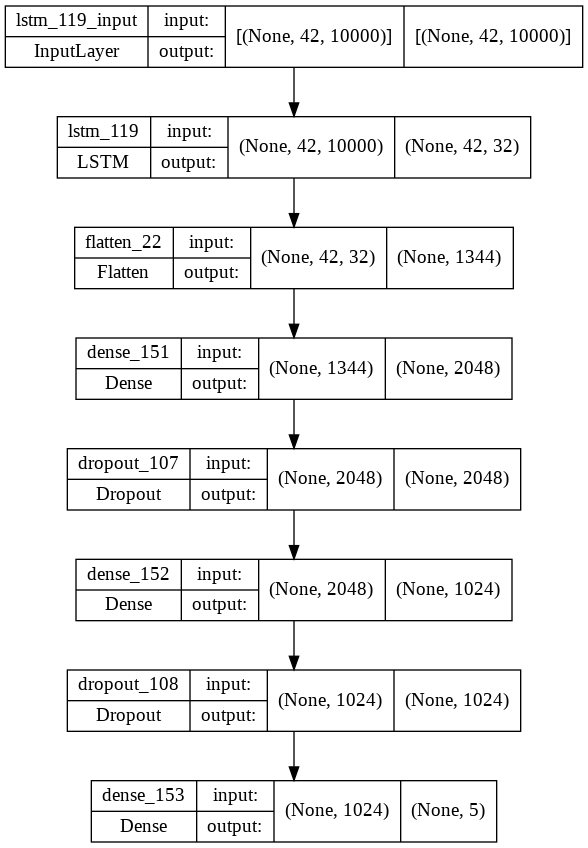

In [384]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

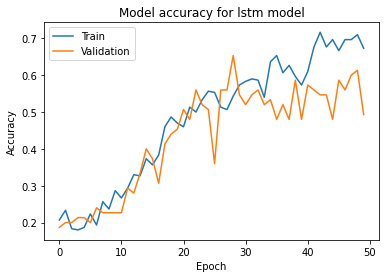

In [385]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for lstm model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

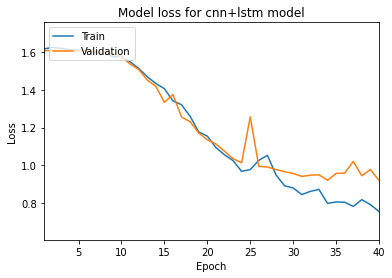

<Figure size 432x288 with 0 Axes>

In [386]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for cnn+lstm model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(1, 40)
# plt.ylim(0, 3)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('loss')

In [387]:
ypred = model.predict(X_test)
# print(ypred)

In [388]:
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)] 

In [389]:
correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
#     print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy}")

Accuracy = 0.49333333333333335


In [393]:
from sklearn import metrics
import seaborn as sn

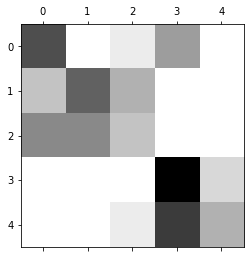

In [394]:
cm= metrics.confusion_matrix(actual_words,predicted_words,labels=['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'])
plt.matshow(cm,cmap='binary')
#print(metrics.classification_report(y_act, y_pred,))
# conf_matrix = metrics.confusion_matrix(y_tes, ypred)

In [395]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [396]:
print(metrics.classification_report(actual_words, predicted_words,labels=['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu']))

              precision    recall  f1-score   support

       Avanu       0.50      0.60      0.55        15
       Bagge       0.57      0.53      0.55        15
        Bari       0.33      0.20      0.25        15
     Guruthu       0.46      0.87      0.60        15
        Hogu       0.67      0.27      0.38        15

    accuracy                           0.49        75
   macro avg       0.51      0.49      0.47        75
weighted avg       0.51      0.49      0.47        75



In [400]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
# print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("/content/drive/MyDrive/kan_lstm_model.h5")

3/3 [==============================] - 0s 16ms/step - loss: 1.0963 - accuracy: 0.4933
Test: accuracy = 0.493333  ;  loss = 1.096340


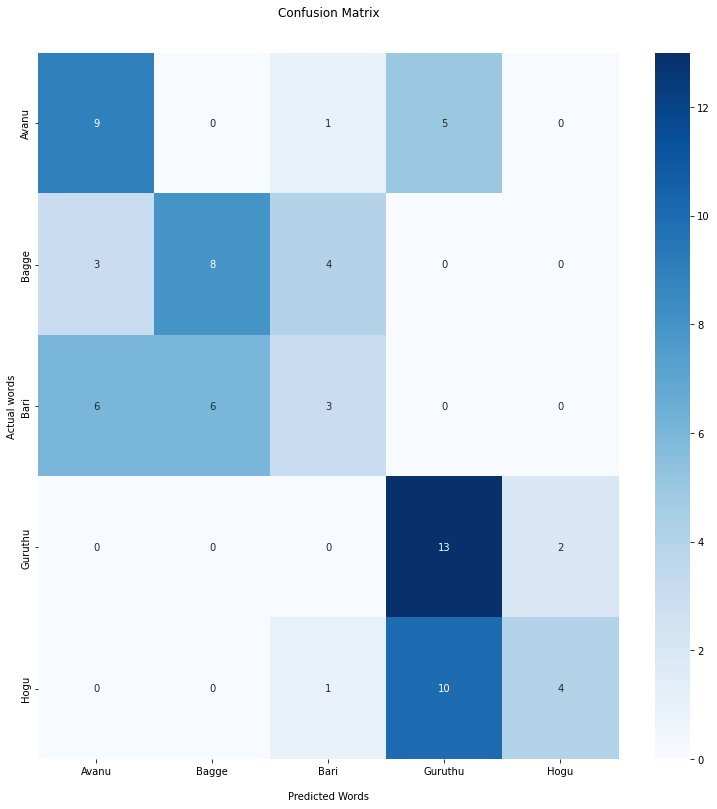

<Figure size 432x288 with 0 Axes>

In [399]:
# y_val1 = list()
# for i in y_test:
#     count = 0
#     for j in i:
#         if( j == 1):
#             y_val1.append(count);
#         count +=1;

# from sklearn.preprocessing import LabelEncoder
# from keras.models import load_model
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
# words_list =['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']
# lb_make = LabelEncoder()
# y_pred = lb_make.fit_transform(predicted_words)
# Y_Test = lb_make.fit_transform(y_val1)
# cm = confusion_matrix(Y_Test, y_pred)
# cm_df = pd.DataFrame(cm,index =words_list,columns = words_list)
# plt.figure(figsize=(10,10))
# sns.heatmap(cm_df, annot=True, cmap="Blues")
# plt.title('Test accuracy  {}'.format(accuracy))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.savefig('Confusion Matrix.jpg')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Words')
ax.set_ylabel('Actual words');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'] )
ax.yaxis.set_ticklabels(['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'] )

## Display the visualization of the Confusion Matrix.
# plt.figure(figsize=(10,9))
plt.show()
plt.savefig('ax')